# Inspect Data

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

from keras.layers import Input, Dense
from keras.models import Sequential
from keras.utils import to_categorical


## Loading dataset and creating dfs

In [82]:
# Load the feature names
features = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/features.txt', sep='\s+', header=None)

# Create unique feature names by combining the index and the feature name. This avoids an issue with duplicate entries
unique_column_names = [f"{row[0]}_{row[1]}" for index, row in features.iterrows()]

# Load X_train and X_test
X_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None, names=unique_column_names)
X_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None, names=unique_column_names)

# Load y_train and y_test
y_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)
y_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None)

# From the test dataset, create a validation dataset
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Load the different subjects
subject_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', sep='\s+', header=None)
subject_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', sep='\s+', header=None)

## Checking Class distributions

In [83]:
# Check for class distribution in y_train
class_distribution_train = y_train[0].value_counts()
print("Class distribution in y_train:")
print(class_distribution_train)

# Check for class distribution in y_val
class_distribution_val = y_val[0].value_counts()
print("\nClass distribution in y_test:")
print(class_distribution_val)

# Check for class distribution in y_test
class_distribution_test = y_test[0].value_counts()
print("\nClass distribution in y_test:")
print(class_distribution_test)

Class distribution in y_train:
0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

Class distribution in y_test:
0
5    278
6    258
1    254
4    235
2    225
3    223
Name: count, dtype: int64

Class distribution in y_test:
0
6    279
4    256
5    254
2    246
1    242
3    197
Name: count, dtype: int64


In [84]:
# Create a mapping for numerical labels
label_mapping = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

# Create a df that contains both numerical and catagorical labels. Useful for plotting graphs
y_train_labels = y_train.copy()
y_train_labels['Descriptive Label'] = y_train_labels[0].replace(label_mapping)

y_test_labels = y_test.copy()
y_test_labels['Descriptive Label'] = y_test_labels[0].replace(label_mapping)

y_val_labels = y_val.copy()
y_val_labels['Descriptive Label'] = y_val_labels[0].replace(label_mapping)

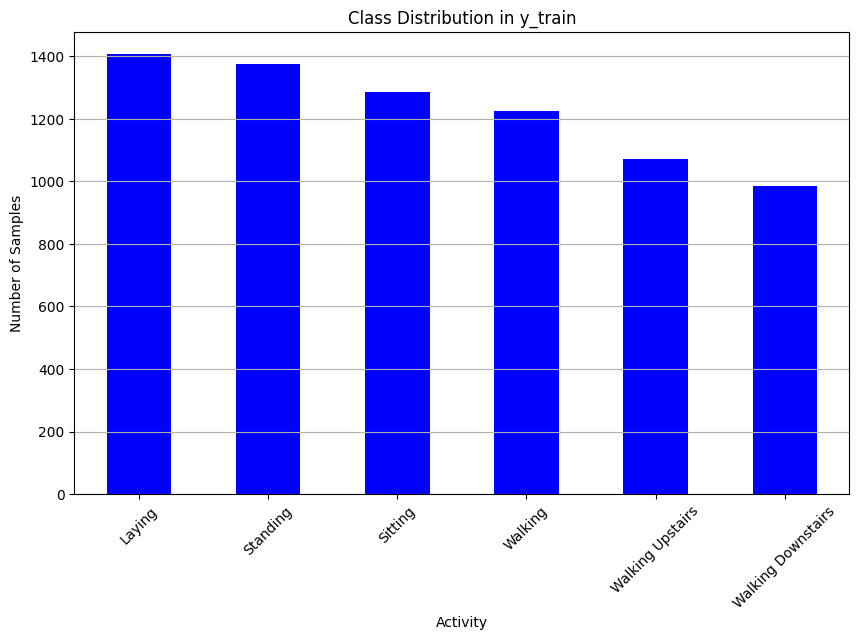

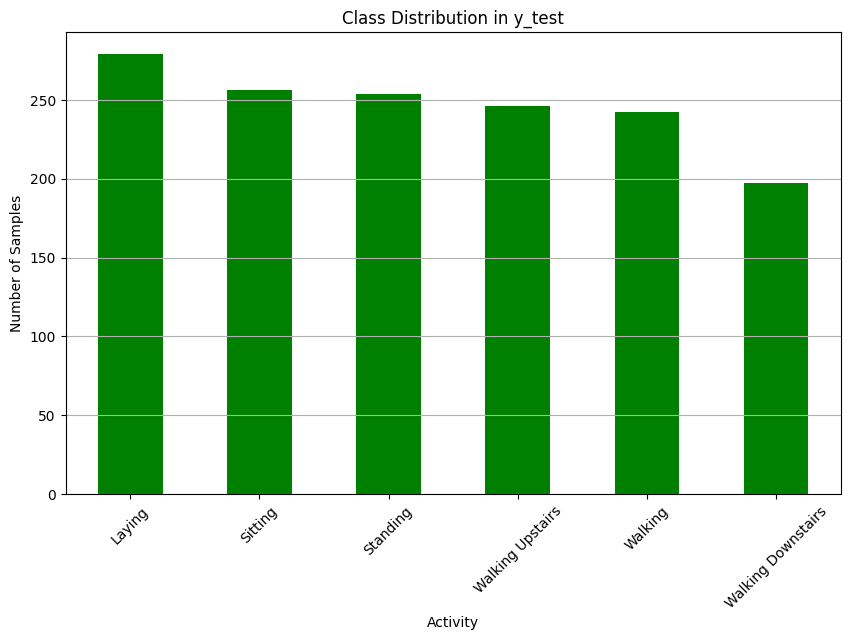

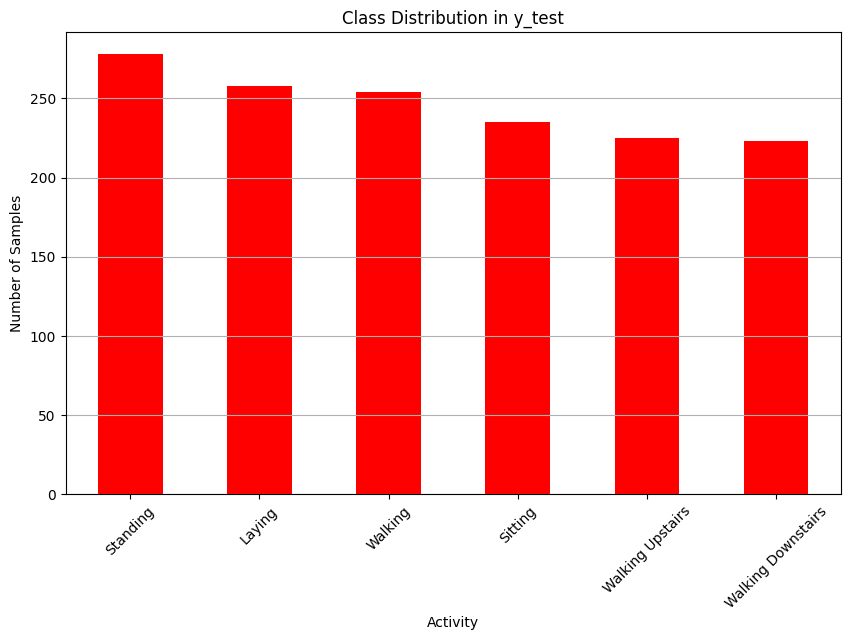

In [85]:
# Bar chart for y_train class distribution
class_distribution_train = y_train_labels['Descriptive Label'].value_counts()
plt.figure(figsize=(10, 6))
class_distribution_train.plot(kind='bar', color='blue')
plt.title('Class Distribution in y_train')
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Bar chart for y_train class distribution
class_distribution_test = y_test_labels['Descriptive Label'].value_counts()
plt.figure(figsize=(10, 6))
class_distribution_test.plot(kind='bar', color='green')
plt.title('Class Distribution in y_test')
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Bar chart for y_val class distribution
class_distribution_val = y_val_labels['Descriptive Label'].value_counts()
plt.figure(figsize=(10, 6))
class_distribution_val.plot(kind='bar', color='red')
plt.title('Class Distribution in y_test')
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Check and deal with missing values

In [86]:
# Check for missing values in X_train
missing_values_X_train = X_train.isnull().sum()
print("Missing values in X_train:\n", missing_values_X_train[missing_values_X_train > 0])

# Check for missing values in X_test
missing_values_X_test = X_test.isnull().sum()
print("\nMissing values in X_test:\n", missing_values_X_test[missing_values_X_test > 0])

# Check for missing values in y_train
missing_values_y_train = y_train.isnull().sum()
print("\nMissing values in y_train:\n", missing_values_y_train[missing_values_y_train > 0])

# Check for missing values in y_test
missing_values_y_test = y_test.isnull().sum()
print("\nMissing values in y_test:\n", missing_values_y_test[missing_values_y_test > 0])

Missing values in X_train:
 Series([], dtype: int64)

Missing values in X_test:
 Series([], dtype: int64)

Missing values in y_train:
 Series([], dtype: int64)

Missing values in y_test:
 Series([], dtype: int64)


## Identify Correlations Between Features. May not be useful yet.

In [87]:
# Assuming X_train is your training dataset as a DataFrame
correlation_matrix = X_train.corr()

# Set a threshold for correlation
threshold = 0.75

# Get the absolute correlation matrix
abs_correlation = correlation_matrix.abs()

# Create a DataFrame to hold the pairs of correlated features
highly_correlated_pairs = []

# Iterate through the correlation matrix
for i in range(len(abs_correlation.columns)):
    for j in range(i):
        # Check if the correlation is above the threshold and features are different
        if abs_correlation.iloc[i, j] > threshold and abs_correlation.columns[i] != abs_correlation.columns[j]:
            highly_correlated_pairs.append((abs_correlation.columns[i], abs_correlation.columns[j], abs_correlation.iloc[i, j]))

# Create a DataFrame for better visualization
highly_correlated_df = pd.DataFrame(highly_correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print only the pairs of highly correlated features where Feature 1 is different from Feature 2
print("Highly correlated features:")
print(highly_correlated_df)

Highly correlated features:
                      Feature 1                  Feature 2  Correlation
0            5_tBodyAcc-std()-Y         4_tBodyAcc-std()-X     0.927461
1            6_tBodyAcc-std()-Z         4_tBodyAcc-std()-X     0.851668
2            6_tBodyAcc-std()-Z         5_tBodyAcc-std()-Y     0.895510
3            7_tBodyAcc-mad()-X         4_tBodyAcc-std()-X     0.998632
4            7_tBodyAcc-mad()-X         5_tBodyAcc-std()-Y     0.922803
...                         ...                        ...          ...
29480  560_angle(Y,gravityMean)  58_tGravityAcc-energy()-Y     0.880564
29481  560_angle(Y,gravityMean)   559_angle(X,gravityMean)     0.783848
29482  561_angle(Z,gravityMean)    43_tGravityAcc-mean()-Z     0.995070
29483  561_angle(Z,gravityMean)     52_tGravityAcc-max()-Z     0.992869
29484  561_angle(Z,gravityMean)     55_tGravityAcc-min()-Z     0.990991

[29485 rows x 3 columns]


## Identify number of components needed for PCA to maintain 95% of Variance

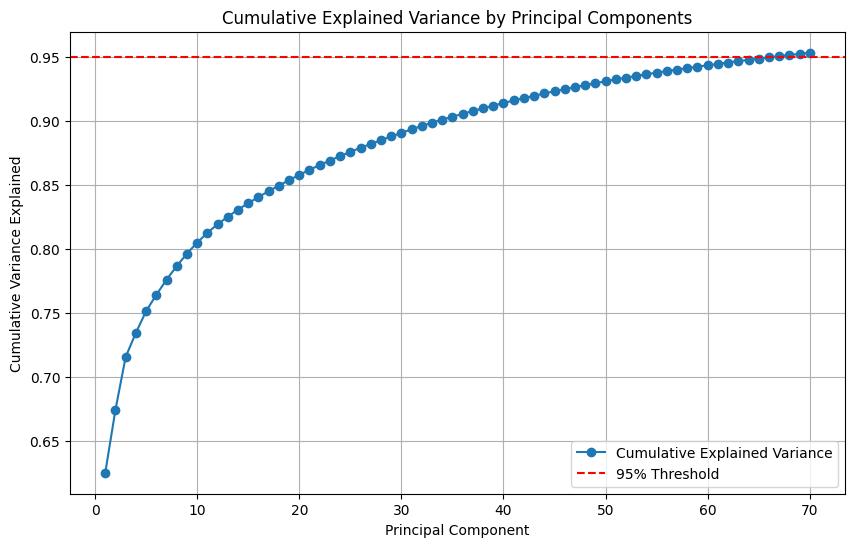

Total variance explained by the first 1 components: 0.6255
Total variance explained by the first 2 components: 0.6747
Total variance explained by the first 3 components: 0.7159
Total variance explained by the first 4 components: 0.7346
Total variance explained by the first 5 components: 0.7516
Total variance explained by the first 6 components: 0.7643
Total variance explained by the first 7 components: 0.7761
Total variance explained by the first 8 components: 0.7868
Total variance explained by the first 9 components: 0.7965
Total variance explained by the first 10 components: 0.8050
Total variance explained by the first 11 components: 0.8127
Total variance explained by the first 12 components: 0.8194
Total variance explained by the first 13 components: 0.8252
Total variance explained by the first 14 components: 0.8308
Total variance explained by the first 15 components: 0.8357
Total variance explained by the first 16 components: 0.8405
Total variance explained by the first 17 componen

In [88]:
# Fit PCA on your dataset
pca = PCA(n_components=70)
X_train_pca = pca.fit_transform(X_train)  # Use fit_transform to get the transformed data
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')  # Optional: add a line for the 90% threshold
plt.legend()
plt.show()

# Print total variance explained by each principal component
for i, var in enumerate(cumulative_variance):
    print(f'Total variance explained by the first {i + 1} components: {var:.4f}')

## Transform X_train and X_test using PCA

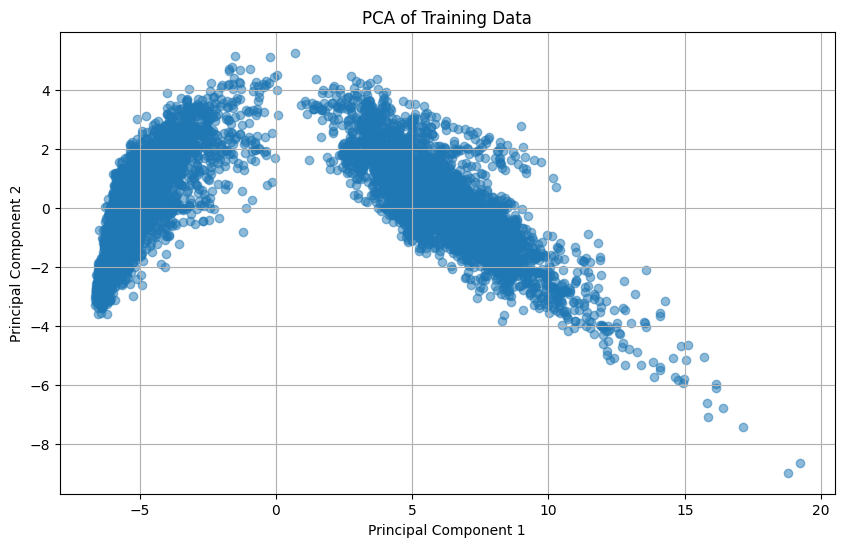

In [89]:
# Apply dimensionality reduction using PCA with optimnal n_components
pca = PCA(n_components=67)
X_train_pca = pca.fit_transform(X_train) # Fit to train data to prevent leakage and then transform
X_test_pca = pca.transform(X_test) # transform test and val data
X_val_pca = pca.transform(X_val)


# Scatter Plot of the First Two Principal Components
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


## Detect and Deal with Anomolies. Should do this before PCA if we are goint to do it.

In [90]:
'''# Define the threshold for anomaly detection
threshold = 3

# Initialize a variable to keep track of the maximum number of anomalies
max_anomalies = 0
max_anomalies_column = None

# Iterate through each column in the training dataset
for col in X_train.columns:
    # Calculate Z-scores for the column
    z_scores_train = (X_train[col] - X_train[col].mean()) / X_train[col].std()

    # Identify anomalies in the column
    anomalies_train = (z_scores_train > threshold) | (z_scores_train < -threshold)

    # Get indices of anomalies for the current column
    anomaly_indices_train = np.where(anomalies_train)[0]

    # Count the number of anomalies detected for the current column
    num_anomalies = len(anomaly_indices_train)
    
    # Print number of anomalies detected for the current column
    print(f'Column {col}: Number of anomalies in training set: {num_anomalies}')

    # Check if the current number of anomalies is greater than the max found so far
    if num_anomalies > max_anomalies:
        max_anomalies = num_anomalies
        max_anomalies_column = col

# After iterating through all columns, print the maximum number of anomalies found
print(f'Maximum number of anomalies detected in a single column: {max_anomalies} (Column {max_anomalies_column})')'''

"# Define the threshold for anomaly detection\nthreshold = 3\n\n# Initialize a variable to keep track of the maximum number of anomalies\nmax_anomalies = 0\nmax_anomalies_column = None\n\n# Iterate through each column in the training dataset\nfor col in X_train.columns:\n    # Calculate Z-scores for the column\n    z_scores_train = (X_train[col] - X_train[col].mean()) / X_train[col].std()\n\n    # Identify anomalies in the column\n    anomalies_train = (z_scores_train > threshold) | (z_scores_train < -threshold)\n\n    # Get indices of anomalies for the current column\n    anomaly_indices_train = np.where(anomalies_train)[0]\n\n    # Count the number of anomalies detected for the current column\n    num_anomalies = len(anomaly_indices_train)\n    \n    # Print number of anomalies detected for the current column\n    print(f'Column {col}: Number of anomalies in training set: {num_anomalies}')\n\n    # Check if the current number of anomalies is greater than the max found so far\n    if 

## Create, train and evaluate Random Forrest Model

Accuracy: 0.83
Precision: 0.95
Recall: 0.83
F1 Score: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       242
           1       0.97      0.76      0.86       246
           2       0.98      0.66      0.79       197
           3       0.93      0.73      0.82       256
           4       0.86      0.87      0.86       254
           5       1.00      0.97      0.98       279

   micro avg       0.95      0.83      0.88      1474
   macro avg       0.95      0.82      0.88      1474
weighted avg       0.95      0.83      0.88      1474
 samples avg       0.83      0.83      0.83      1474



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


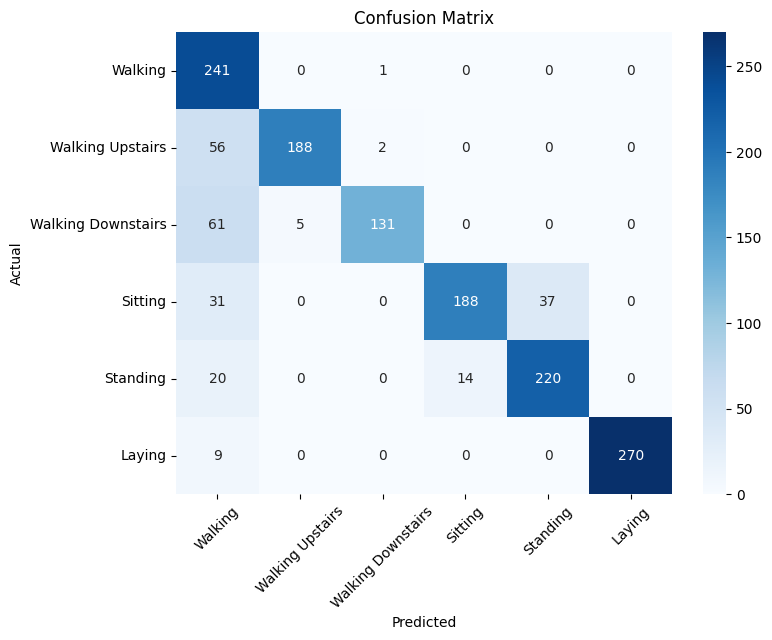

In [91]:
# Convert labels to one-hot encoding for classification problem
y_train_categorical = to_categorical(y_train - 1, num_classes=6)  # y_train has values 1 to 6
y_val_categorical = to_categorical(y_val - 1, num_classes=6)
y_test_categorical = to_categorical(y_test - 1)

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf_model.fit(X_train_pca, y_train_categorical)

# Make predictions and then convert predictions into classes
y_pred_rf = rf_model.predict(X_test_pca)
y_pred_rf_classes = np.argmax(y_pred_rf, axis=1)  # Get class labels
y_true_rf_classes = np.argmax(y_test_categorical, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_rf) 
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test_categorical, y_pred_rf, average='weighted')
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test_categorical, y_pred_rf, average='weighted')
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test_categorical, y_pred_rf, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_categorical, y_pred_rf))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_rf_classes, y_pred_rf_classes)

# Plot confusion matrix with descriptive labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(label_mapping.values()), 
            yticklabels=list(label_mapping.values()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

## Evaluate Random Forrest model for over fitting

In [92]:
# Print training and test accuracy to monitor overfitting
train_accuracy = accuracy_score(y_train_categorical, rf_model.predict(X_train_pca))
test_accuracy = accuracy_score(y_test_categorical, rf_model.predict(X_test_pca))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Perform cross-validation to confirm results
cv_scores = cross_val_score(rf_model, X_train_pca, y_train_categorical, cv=10)
print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.83
Mean Cross-Validation Score: 0.79


## Build, Train and Evaluate Neural Network

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4159 - loss: 1.5835 - val_accuracy: 0.8520 - val_loss: 0.6084
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8979 - loss: 0.4447 - val_accuracy: 0.9206 - val_loss: 0.3243
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9342 - loss: 0.2457 - val_accuracy: 0.9274 - val_loss: 0.2338
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9508 - loss: 0.1656 - val_accuracy: 0.9423 - val_loss: 0.1928
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9603 - loss: 0.1288 - val_accuracy: 0.9437 - val_loss: 0.1772
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1091 - val_accuracy: 0.9457 - val_loss: 0.1671
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9656 - loss: 0.1023 - val_accuracy: 0.9457 - val_loss: 0.1648
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9708 - loss: 0.0903 - val_accuracy: 0.

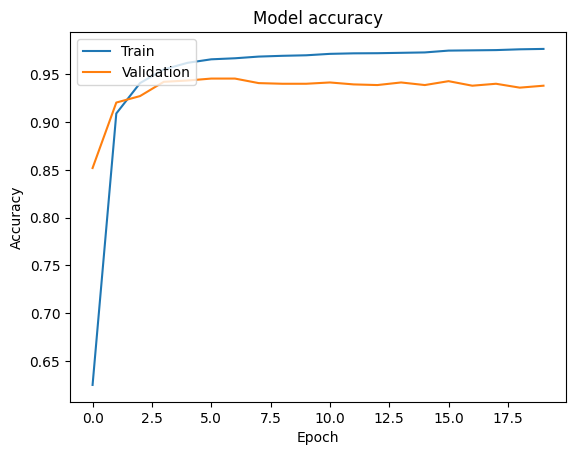

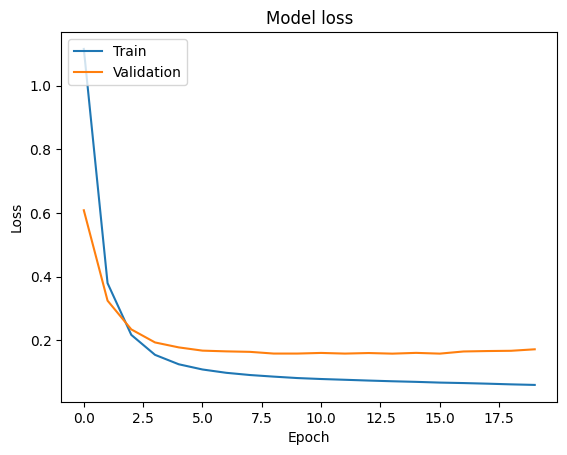

In [93]:
# Define the input shape (67 principal components)
input_shape = (67,)

# Create a Sequential model
model = Sequential()

# Add layers to the model, increasing complexity leads to overfitting very quickly
model.add(Input(shape=input_shape))  # This sets the input shape
model.add(Dense(16, activation='relu'))   # One hidden layer
model.add(Dense(6, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using one-hot encoded labels
history = model.fit(X_train_pca, y_train_categorical, validation_data=(X_val_pca, y_val_categorical), epochs=20, batch_size=32)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9410 - loss: 0.1917
Test Loss: 0.2094
Test Accuracy: 0.9362
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


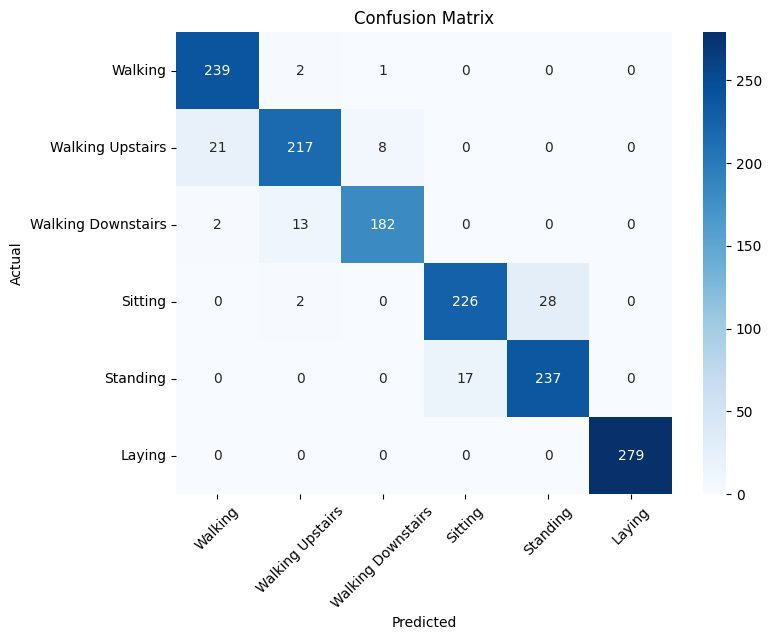

Precision: 0.9368
Recall: 0.9362
F1 Score: 0.9360
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       242
           1       0.93      0.88      0.90       246
           2       0.95      0.92      0.94       197
           3       0.93      0.88      0.91       256
           4       0.89      0.93      0.91       254
           5       1.00      1.00      1.00       279

    accuracy                           0.94      1474
   macro avg       0.94      0.93      0.93      1474
weighted avg       0.94      0.94      0.94      1474



In [94]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pca, y_test_categorical)
print(f'Test Loss: {loss:.4f}\nTest Accuracy: {accuracy:.4f}')

# Get predictions
y_pred = model.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class labels
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix with descriptive labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(label_mapping.values()), 
            yticklabels=list(label_mapping.values()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

# Calculate and print metrics
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')  # Change to 'macro' or 'micro' as needed
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

print(classification_report(y_true_classes, y_pred_classes))

### ADD CROSS VALIDATION? COULD DO IT AFTER OPTIMIZING

## Build, Train and Evaluate 3rd Model